In [1]:
# Last modification: 2015-aug-29 Bogota
%pylab inline
from random import *
from observational_data import *
from constants import *
from functions import *

Populating the interactive namespace from numpy and matplotlib


observational_data.py:64: RuntimeWarning: divide by zero encountered in divide
  Obs_data2_log10yerror = [array(log10(Bouwens[:,1]/(Bouwens[:,1]-Bouwens[:,2]))),


In [2]:
###################################
# Behroozi et. al. Data

aux = np.loadtxt('../data/Behroozi/sfr_release.dat') #,usecols=(0,1,2,3),skiprows=1)
Behroozi =[]
for i in range (aux.shape[0]):
    if(aux[i,0]==7.030747):   # (1+z)  , Redshift z= 6.03, next closer z=5.91
        if(aux[i,2]>-10):     #minimun log(SFR)
            if(aux[i,1]>10.3):  #minimun log(mass)
                Behroozi.append([aux[i,1], aux[i,2]])
Behroozi = np.array( Behroozi)
#(1+z) Log10(Halo Mass) Log10(<SFR>) Log10(Median SM)
#Units are Msun, Msun/yr, and Msun, respectively.


###################################
# Gonzalez-Perez et. al. Data

Gonzalez  = np.loadtxt( 'analysis/gonzalez_data.dat')
# log10(Halo_Mass), log10(SFR_mean), log10(SFR_per25), log10(SFR_per50), log10(SFR_per75)

In [3]:
Dust_Ext = 0
### MINIMUN MASS IN THE CATALOG: 10**10.3 Msun

Dust Extinction ON


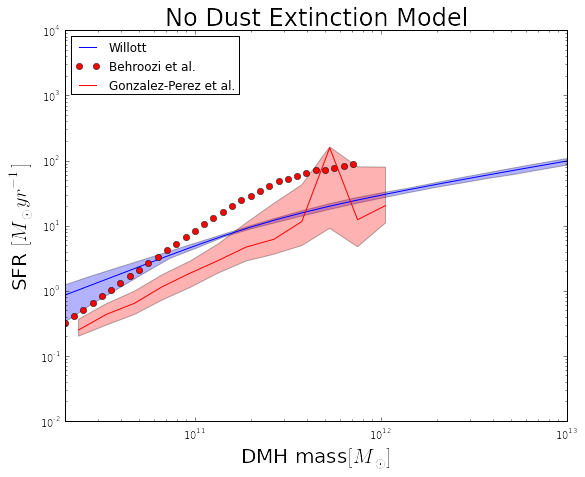

In [6]:
Parameters=[]

N_Obs_Sets = [1,]       # OD1, OD2, OD3, OD4

for i in N_Obs_Sets:
    if (Dust_Ext == 1):
        Parameters.append(np.loadtxt('analysis/best_parameters_w_ext_OD'+str(i)+'.dat',usecols=(0,1,2,3),skiprows=1))
    else:
        Parameters.append(np.loadtxt('analysis/best_parameters_wo_ext_OD'+str(i)+'.dat',usecols=(0,1,2,3),skiprows=1))
Dust_Extinction()
Parameters = np.array(Parameters)

Mass = logspace(10.3,13,20)
SFR = []

L_0   = 10**Parameters[:,:,0]
M_0   = 10**Parameters[:,:,1]
beta  = Parameters[:,:,2]
gamma = Parameters[:,:,3]


for i in N_Obs_Sets:
    aux=[]
    k = i-1
    for j in range(0,64):
        aux.append(StarFormationRate(Mass, L_0[k][j], M_0[k][j], beta[k][j], gamma[k][j]))
    aux=array(aux)
    SFR.append(aux)
SFR = array(SFR)

SFR_avrg = np.zeros([4,20])
SFR_1qrt = np.zeros([4,20])
SFR_3qrt = np.zeros([4,20])

for i in N_Obs_Sets:
    k = i-1
    for j in range(0,Mass.size):
        SFR_avrg[k,j] = average(SFR[k,:,j])
        SFR_1qrt[k,j] = percentile(SFR[k,:,j],25)
        SFR_3qrt[k,j] = percentile(SFR[k,:,j],75)

#################################################################
#                                                               #
#                           Plotting                            #
#                                                               #
#################################################################
        
colors=['blue','red','green','black']
authors=[OD1[3], OD2[3], OD3[3], OD4[3]]

figure(figsize=(9,7))

################################
#              Our results 
for i in range(0,1):
    plot(Mass,SFR_avrg[i],color=colors[i], label=authors[i])
    fill_between(Mass,SFR_1qrt[i],SFR_3qrt[i], facecolor=colors[i],alpha=0.3)
    plt.yscale('log', nonposy='clip')
    plt.xscale('log')
    
################################
#  Behroozi et al & Perez et al    
plot( 10**Behroozi[:,0], 10**Behroozi[:,1], 'ro', label='Behroozi et al.')
plot(10**Gonzalez[:,0],10**Gonzalez[:,3], c="red", label='Gonzalez-Perez et al.')
fill_between(10**Gonzalez[:,0],10**Gonzalez[:,2],10**Gonzalez[:,4], facecolor="red",alpha=0.3)

###############################
legend(loc='upper left')

xlim([10**10.3,10**13])
ylim([10**-2,10**4])
xlabel("DMH mass$[M_\odot]$", fontsize=20)
ylabel("SFR $[M_\odot yr^{-1}]$", fontsize=20)

#Dust_Extinction()
if Dust_Ext == 1:    title('Dust Extinction Model', fontsize=24); savefig('analysis/SFR_DMHM_w.pdf')
else:                title('No Dust Extinction Model', fontsize=24); savefig('analysis/SFR_DMHM_wo.pdf')